# **Validación Cruzada (70%) y Métodos de Aprendizaje Supervisado**

En este notebook se implementa el proceso de validación cruzada utilizando el 70% de los datos para el entrenamiento y el 30% restante para la evaluación del modelo.
Este enfoque permite estimar de manera más robusta el desempeño de los algoritmos y reducir el riesgo de sobreajuste (overfitting), asegurando una mejor generalización sobre datos no vistos.

Asimismo, se aplican diferentes métodos de aprendizaje supervisado, con el objetivo de comparar su capacidad predictiva y determinar cuál ofrece el mejor rendimiento para el problema de diagnóstico de diabetes.
Los modelos implementados son los siguientes:

* Regresión Logística (Logistic Regression)
* Árbol de Decisión (Decision Tree)
* Red Neuronal (Neural Network)
* K-Vecinos Más Cercanos (K-Nearest Neighbors, KNN)

Para la evaluación del desempeño de los modelos se emplearán las siguientes métricas de evaluación:

* Precisión (Precision): mide la proporción de predicciones positivas que fueron correctas.

* Exhaustividad o Sensibilidad (Recall): indica la proporción de casos positivos correctamente identificados por el modelo.

* F1-Score: combina precisión y recall en una sola medida balanceada, útil cuando existe un desbalance en las clases.

* ROC-AUC: evalúa la capacidad del modelo para distinguir entre clases, proporcionando una métrica global del rendimiento clasificatorio.

Estas métricas permiten realizar una evaluación integral de los modelos, considerando tanto su capacidad de clasificación correcta como su habilidad para manejar posibles desequilibrios en los datos.

# Preparación de Datos

In [1]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargamos los datos normalizados
data = pd.read_excel("datos_numericos_diabetes_dataset.xlsx")
data.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes,family_history_diabetes_1
0,0,0.555556,0.258103,0.640496,0.564103,0.494382,0.269231,0.516432,0.366242,0.678571,0.144275,0.720690,1,0
1,1,0.416667,0.171669,0.334711,0.333333,0.438202,0.448718,0.000000,0.000000,0.294643,0.000000,0.281034,0,0
2,2,0.583333,0.068427,0.297521,0.358974,0.280899,0.589744,0.230047,0.019108,0.517857,0.101588,0.605172,1,1
3,3,0.777778,0.058824,0.487603,0.538462,0.337079,0.384615,0.136150,0.350318,0.705357,0.108537,0.867241,1,0
4,4,0.388889,0.130852,0.256198,0.282051,0.022472,0.410256,0.352113,0.414013,0.687500,0.355394,0.551724,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          100000 non-null  int64  
 1   age                                 100000 non-null  float64
 2   physical_activity_minutes_per_week  100000 non-null  float64
 3   bmi                                 100000 non-null  float64
 4   waist_to_hip_ratio                  100000 non-null  float64
 5   systolic_bp                         100000 non-null  float64
 6   hdl_cholesterol                     100000 non-null  float64
 7   ldl_cholesterol                     100000 non-null  float64
 8   triglycerides                       100000 non-null  float64
 9   glucose_fasting                     100000 non-null  float64
 10  insulin_level                       100000 non-null  float64
 11  hba1c                      

In [4]:
# Elimianos columna unnamed: 0 (innecesaria)
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  float64
 1   physical_activity_minutes_per_week  100000 non-null  float64
 2   bmi                                 100000 non-null  float64
 3   waist_to_hip_ratio                  100000 non-null  float64
 4   systolic_bp                         100000 non-null  float64
 5   hdl_cholesterol                     100000 non-null  float64
 6   ldl_cholesterol                     100000 non-null  float64
 7   triglycerides                       100000 non-null  float64
 8   glucose_fasting                     100000 non-null  float64
 9   insulin_level                       100000 non-null  float64
 10  hba1c                               100000 non-null  float64
 11  diagnosed_diabetes         

In [5]:
#Cargamos los datos discretizados
data_cat = pd.read_excel("datos_categoricos_diabetes_dataset.xlsx")
data_cat.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,family_history_diabetes,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes
0,0,Adulto Medio,Adecuada,0,Obesidad,Moderado,Hipertensión 1,Normal,Límite Alto,Normal,Diabetes,Normal,Diabetes,1
1,1,Adulto Medio,Baja,0,Normal,Bajo,Elevada,Normal,Óptimo,Normal,Normal,Bajo,Normal,0
2,2,Adulto Medio,Inactivo,1,Normal,Moderado,Normal,Alto,Óptimo,Normal,Prediabetes,Normal,Diabetes,1
3,3,Adulto Mayor,Inactivo,0,Sobrepeso,Moderado,Normal,Normal,Óptimo,Normal,Diabetes,Normal,Diabetes,1
4,4,Adulto Medio,Baja,0,Normal,Bajo,Normal,Normal,Casi Óptimo,Límite Alto,Diabetes,Normal,Diabetes,1


In [6]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          100000 non-null  int64 
 1   age                                 100000 non-null  object
 2   physical_activity_minutes_per_week  100000 non-null  object
 3   family_history_diabetes             100000 non-null  int64 
 4   bmi                                 100000 non-null  object
 5   waist_to_hip_ratio                  100000 non-null  object
 6   systolic_bp                         100000 non-null  object
 7   hdl_cholesterol                     100000 non-null  object
 8   ldl_cholesterol                     100000 non-null  object
 9   triglycerides                       100000 non-null  object
 10  glucose_fasting                     100000 non-null  object
 11  insulin_level                       1000

In [7]:
#Corrección del tipo de datos object a categorías
data_cat['age'] = data_cat['age'].astype('category')
data_cat['physical_activity_minutes_per_week'] = data_cat['physical_activity_minutes_per_week'].astype('category')
data_cat['family_history_diabetes'] = data_cat['family_history_diabetes'].astype('category')
data_cat['bmi'] = data_cat['bmi'].astype('category')
data_cat['waist_to_hip_ratio'] = data_cat['waist_to_hip_ratio'].astype('category')
data_cat['systolic_bp'] = data_cat['systolic_bp'].astype('category')
data_cat['hdl_cholesterol'] = data_cat['hdl_cholesterol'].astype('category')
data_cat['ldl_cholesterol'] = data_cat['ldl_cholesterol'].astype('category')
data_cat['triglycerides'] = data_cat['triglycerides'].astype('category')
data_cat['glucose_fasting'] = data_cat['glucose_fasting'].astype('category')
data_cat['insulin_level'] = data_cat['insulin_level'].astype('category')
data_cat['hba1c'] = data_cat['hba1c'].astype('category')
data_cat['diagnosed_diabetes'] = data_cat['diagnosed_diabetes'].astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Unnamed: 0                          100000 non-null  int64   
 1   age                                 100000 non-null  category
 2   physical_activity_minutes_per_week  100000 non-null  category
 3   family_history_diabetes             100000 non-null  category
 4   bmi                                 100000 non-null  category
 5   waist_to_hip_ratio                  100000 non-null  category
 6   systolic_bp                         100000 non-null  category
 7   hdl_cholesterol                     100000 non-null  category
 8   ldl_cholesterol                     100000 non-null  category
 9   triglycerides                       100000 non-null  category
 10  glucose_fasting                     100000 non-null  category
 11  insulin_level 

In [8]:
# Elimianos columna unnamed: 0 (innecesaria)
data_cat = data_cat.drop(['Unnamed: 0'], axis=1)
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       100000 non-null  category
 11  hba1c         

#1. División 70% - 30% (Datos Normalizados)

<Axes: xlabel='diagnosed_diabetes'>

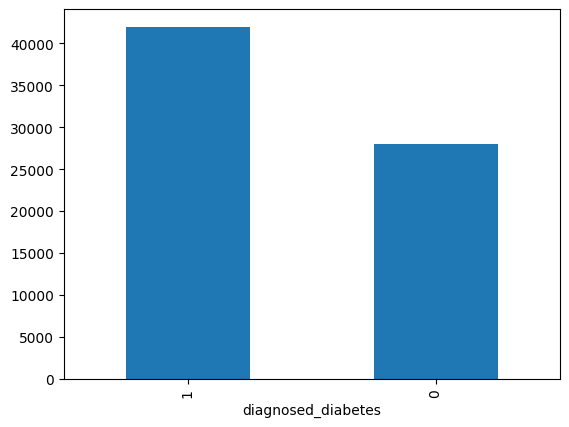

In [9]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y = data['diagnosed_diabetes'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train.value_counts().plot(kind='bar')

#2. Validación Cruzada

In [10]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring = ('f1_macro', 'roc_auc','precision_macro', 'recall_macro')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)# MUestreo Estratificado

# 3. Modelos Predictivos (Datos Normalizados)

3.1. KNN

In [11]:
#Método Perezoso (KNN)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.158539,12.122180,0.815840,0.904455,0.877207,0.967155,0.814251,0.901723,0.817815,0.908082
1,0.168958,11.386157,0.814993,0.903153,0.881022,0.966553,0.813334,0.900370,0.817083,0.906885
2,0.173158,10.424577,0.807012,0.904420,0.875506,0.967105,0.805918,0.901656,0.808274,0.908109
3,0.156412,10.996060,0.825515,0.905560,0.883122,0.967377,0.823587,0.902807,0.828036,0.909220
4,0.168893,9.964903,0.815625,0.904702,0.879227,0.967379,0.813916,0.902011,0.817798,0.908248
5,0.167184,10.358694,0.820466,0.904669,0.881411,0.967207,0.818032,0.902065,0.824167,0.908056
6,0.155775,10.269276,0.818010,0.904747,0.878637,0.967025,0.816264,0.902025,0.820238,0.908354
7,0.153845,10.976665,0.825860,0.903024,0.884173,0.966425,0.824240,0.900198,0.827857,0.906846
8,0.167870,10.657831,0.817221,0.904098,0.877830,0.966960,0.815538,0.901405,0.819345,0.907653
9,0.167879,11.618969,0.815035,0.904718,0.878205,0.967259,0.813164,0.901987,0.817500,0.908340


In [12]:
# Promedios para verificar overfitting comparando medida de train y test
scores.mean()

,0
fit_time,0.163851
score_time,10.877531
test_f1_macro,0.817558
train_f1_macro,0.904355
test_roc_auc,0.879634
train_roc_auc,0.967045
test_precision_macro,0.815824
train_precision_macro,0.901625
test_recall_macro,0.819811
train_recall_macro,0.907979


In [13]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_roc_auc']
print(comparacion_CV)

        Knn
0  0.877207
1  0.881022
2  0.875506
3  0.883122
4  0.879227
5  0.881411
6  0.878637
7  0.884173
8  0.877830
9  0.878205


3.2. Red Neuronal

In [14]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(20), learning_rate='constant',
                     learning_rate_init=0.1, momentum= 0.7, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.942703,0.028562,0.907757,0.906449,0.943385,0.944021,0.905443,0.904152,0.921415,0.920126
1,3.740739,0.021457,0.902654,0.899627,0.931386,0.929125,0.899386,0.896464,0.913988,0.911070
2,4.274093,0.021312,0.902367,0.903537,0.946060,0.944145,0.902601,0.903489,0.919345,0.920236
3,3.874354,0.021450,0.901969,0.899043,0.941331,0.942639,0.898811,0.895844,0.913571,0.910350
4,9.797801,0.038517,0.909149,0.907057,0.945845,0.943597,0.906571,0.905037,0.922440,0.921229
5,7.672666,0.033654,0.905787,0.903320,0.942707,0.943529,0.903159,0.900611,0.918810,0.916044
6,5.983388,0.022080,0.903315,0.907721,0.925474,0.929407,0.902087,0.905708,0.918512,0.921936
7,7.518691,0.028098,0.894348,0.889255,0.947462,0.942250,0.890649,0.885586,0.901369,0.897321
8,3.380507,0.028355,0.899980,0.901672,0.943484,0.943505,0.897429,0.898676,0.912857,0.913663
9,6.034458,0.025117,0.904318,0.909113,0.938705,0.944077,0.903982,0.907974,0.920714,0.924687


In [15]:
scores.mean()

,0
fit_time,5.521940
score_time,0.026860
test_f1_macro,0.903164
train_f1_macro,0.902679
test_roc_auc,0.940584
train_roc_auc,0.940630
test_precision_macro,0.901012
train_precision_macro,0.900354
test_recall_macro,0.916302
train_recall_macro,0.915666


In [16]:
#Se almacena en el df la medida a comparar
comparacion_CV['Red_Neuronal']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal
0  0.877207      0.943385
1  0.881022      0.931386
2  0.875506      0.946060
3  0.883122      0.941331
4  0.879227      0.945845
5  0.881411      0.942707
6  0.878637      0.925474
7  0.884173      0.947462
8  0.877830      0.943484
9  0.878205      0.938705


3.2. Regresión Logística

In [17]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Regresión Logística
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression(
    solver='liblinear',      # Algoritmo adecuado para datasets pequeños o medianos
    penalty='l2',            # Regularización L2 por defecto
    max_iter=1000,           # Aumentar iteraciones para asegurar convergencia
    random_state=42
)

scores = cross_validate(model_rl, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.355887,0.018367,0.854113,0.853578,0.935390,0.934429,0.856329,0.856097,0.852224,0.851468
1,0.320333,0.017658,0.857002,0.853087,0.934956,0.934507,0.859044,0.855684,0.855238,0.850922
2,0.357377,0.018165,0.851038,0.853430,0.935387,0.934442,0.854803,0.855897,0.848095,0.851358
3,0.344133,0.018017,0.861910,0.852341,0.936339,0.934315,0.863598,0.855074,0.860417,0.850082
4,0.354634,0.017454,0.854207,0.853033,0.936085,0.934381,0.856996,0.855694,0.851905,0.850823
5,0.338727,0.016349,0.852140,0.853388,0.932064,0.934840,0.854374,0.855933,0.850238,0.851259
6,0.338834,0.016540,0.850031,0.853809,0.933257,0.934677,0.852731,0.856341,0.847798,0.851689
7,0.281368,0.015919,0.855524,0.852695,0.938935,0.934035,0.859398,0.855217,0.852500,0.850584
8,0.275932,0.015342,0.849408,0.853597,0.932492,0.934817,0.851736,0.856166,0.847440,0.851451
9,0.258421,0.015732,0.847491,0.854430,0.929832,0.935051,0.849724,0.856950,0.845595,0.852317


In [18]:
scores.mean()

,0
fit_time,0.322565
score_time,0.016954
test_f1_macro,0.853286
train_f1_macro,0.853339
test_roc_auc,0.934474
train_roc_auc,0.934549
test_precision_macro,0.855873
train_precision_macro,0.855905
test_recall_macro,0.851145
train_recall_macro,0.851195


In [19]:
#Se almacena en el df la medida a comparar
comparacion_CV['Regresion_Logistica']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica
0  0.877207      0.943385             0.935390
1  0.881022      0.931386             0.934956
2  0.875506      0.946060             0.935387
3  0.883122      0.941331             0.936339
4  0.879227      0.945845             0.936085
5  0.881411      0.942707             0.932064
6  0.878637      0.925474             0.933257
7  0.884173      0.947462             0.938935
8  0.877830      0.943484             0.932492
9  0.878205      0.938705             0.929832


#4. División 70% - 30% (Datos discretizados)

In [20]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       100000 non-null  category
 11  hba1c         

In [21]:
# Creamos variables dummy para convertir las categorías a números
data_cat = pd.get_dummies(data_cat, columns=['age', 'physical_activity_minutes_per_week',
                                             'bmi', 'waist_to_hip_ratio', 'systolic_bp',
                                             'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
                                             'glucose_fasting', 'insulin_level', 'hba1c'], drop_first=False, dtype=int)

# Variables con dos categorías (drop_first=True)
data_cat = pd.get_dummies(data_cat, columns=['family_history_diabetes'], drop_first=True, dtype=int)

data_cat.head()

,diagnosed_diabetes,age_Adulto Joven,age_Adulto Mayor,age_Adulto Medio,age_Anciano,age_Joven,physical_activity_minutes_per_week_Adecuada,physical_activity_minutes_per_week_Alta,physical_activity_minutes_per_week_Baja,physical_activity_minutes_per_week_Inactivo,...,glucose_fasting_Normal,glucose_fasting_Prediabetes,insulin_level_Bajo,insulin_level_Elevado,insulin_level_Muy Elevado,insulin_level_Normal,hba1c_Diabetes,hba1c_Normal,hba1c_Prediabetes,family_history_diabetes_1
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [22]:
#Se codifican las categorias de la VARIABLE OBJETIVO (Cambiar high y low por 0 y 1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_cat["diagnosed_diabetes"]=labelencoder.fit_transform(data_cat["diagnosed_diabetes"]) #Objetivo

data_cat.head()

,diagnosed_diabetes,age_Adulto Joven,age_Adulto Mayor,age_Adulto Medio,age_Anciano,age_Joven,physical_activity_minutes_per_week_Adecuada,physical_activity_minutes_per_week_Alta,physical_activity_minutes_per_week_Baja,physical_activity_minutes_per_week_Inactivo,...,glucose_fasting_Normal,glucose_fasting_Prediabetes,insulin_level_Bajo,insulin_level_Elevado,insulin_level_Muy Elevado,insulin_level_Normal,hba1c_Diabetes,hba1c_Normal,hba1c_Prediabetes,family_history_diabetes_1
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


<Axes: xlabel='diagnosed_diabetes'>

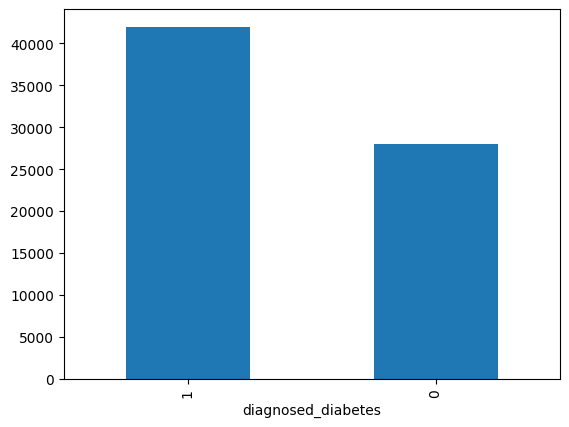

In [23]:
#División 70-30
from sklearn.model_selection import train_test_split
X_C = data_cat.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y_C = data_cat['diagnosed_diabetes'] #Variable objetivo
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(X_C, Y_C, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train_C.value_counts().plot(kind='bar')

In [24]:
#Método de ML a usar en la validación cruzada
from sklearn.tree import DecisionTreeClassifier # Importar el clasificador

# Inicializar el modelo de Árbol de Decisión para clasificación
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=None) # Usar el clasificador

scores = cross_validate(modelTree, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False) # return_train_score=True saber si tiene overfitting
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.208705,0.018734,0.904686,0.914406,0.932591,0.965625,0.903004,0.911905,0.919286,0.928100
1,0.203741,0.020637,0.904843,0.914573,0.933069,0.965656,0.902519,0.912024,0.918393,0.928186
2,0.202494,0.018956,0.904715,0.914510,0.930592,0.965570,0.902467,0.912047,0.918393,0.928279
3,0.195458,0.018311,0.913774,0.913999,0.936420,0.964450,0.911054,0.911565,0.927024,0.927796
4,0.198220,0.020209,0.902280,0.915008,0.932398,0.965778,0.900201,0.912378,0.916131,0.928491
5,0.219249,0.018322,0.908634,0.914219,0.933449,0.965169,0.906350,0.911908,0.922440,0.928246
6,0.197818,0.017544,0.905638,0.914665,0.937059,0.965050,0.903000,0.912092,0.918631,0.928239
7,0.196570,0.019043,0.905032,0.914698,0.930870,0.966114,0.902902,0.912283,0.918929,0.928563
8,0.201622,0.019054,0.915822,0.913341,0.939617,0.965193,0.912589,0.911085,0.928036,0.927419
9,0.225614,0.022878,0.910748,0.914201,0.935083,0.965124,0.908154,0.911888,0.924034,0.928228


In [26]:
scores.mean()

,0
fit_time,0.204949
score_time,0.019369
test_f1_macro,0.907617
train_f1_macro,0.914362
test_roc_auc,0.934115
train_roc_auc,0.965373
test_precision_macro,0.905224
train_precision_macro,0.911917
test_recall_macro,0.921130
train_recall_macro,0.928155


In [27]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree
0  0.877207      0.943385             0.935390  0.932591
1  0.881022      0.931386             0.934956  0.933069
2  0.875506      0.946060             0.935387  0.930592
3  0.883122      0.941331             0.936339  0.936420
4  0.879227      0.945845             0.936085  0.932398
5  0.881411      0.942707             0.932064  0.933449
6  0.878637      0.925474             0.933257  0.937059
7  0.884173      0.947462             0.938935  0.930870
8  0.877830      0.943484             0.932492  0.939617
9  0.878205      0.938705             0.929832  0.935083


#5 Métodos de Ensambles

**Random Forest**

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo de Random Forest
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)

scores = cross_validate(model_rf, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,4.341839,0.259400,0.908172,0.915460,0.935206,0.981310,0.907425,0.913682,0.924226,0.930408
1,3.607823,0.239265,0.909294,0.915226,0.932865,0.981410,0.908287,0.913496,0.925060,0.930236
2,4.480903,0.229728,0.910445,0.915150,0.936986,0.981351,0.909384,0.913451,0.926190,0.930203
3,3.589843,0.229359,0.916240,0.914768,0.938228,0.981336,0.914207,0.913098,0.930833,0.929846
4,4.426185,0.281751,0.907151,0.915589,0.933457,0.981289,0.906353,0.913809,0.923095,0.930541
5,3.791797,0.254942,0.913004,0.914834,0.936966,0.981602,0.911600,0.913175,0.928393,0.929932
6,4.470493,0.269289,0.912413,0.914853,0.938072,0.981108,0.910941,0.913212,0.927679,0.929978
7,3.573456,0.266580,0.910865,0.915635,0.933019,0.981586,0.909699,0.913841,0.926488,0.930567
8,4.290555,0.288021,0.921652,0.914247,0.940067,0.980981,0.919023,0.912646,0.935476,0.929403
9,3.446527,0.224690,0.914553,0.914945,0.939739,0.981262,0.912838,0.913277,0.929507,0.930040


In [29]:
scores.mean()

,0
fit_time,4.001942
score_time,0.254302
test_f1_macro,0.912379
train_f1_macro,0.915071
test_roc_auc,0.936461
train_roc_auc,0.981324
test_precision_macro,0.910976
train_precision_macro,0.913369
test_recall_macro,0.927695
train_recall_macro,0.930115


In [30]:
#Se almacena en el df la medida a comparar
comparacion_CV['Random_Forest']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree  Random_Forest
0  0.877207      0.943385             0.935390  0.932591       0.935206
1  0.881022      0.931386             0.934956  0.933069       0.932865
2  0.875506      0.946060             0.935387  0.930592       0.936986
3  0.883122      0.941331             0.936339  0.936420       0.938228
4  0.879227      0.945845             0.936085  0.932398       0.933457
5  0.881411      0.942707             0.932064  0.933449       0.936966
6  0.878637      0.925474             0.933257  0.937059       0.938072
7  0.884173      0.947462             0.938935  0.930870       0.933019
8  0.877830      0.943484             0.932492  0.939617       0.940067
9  0.878205      0.938705             0.929832  0.935083       0.939739


**XGBoost**

In [31]:
# XGBoost
from xgboost import XGBClassifier

# Definir el modelo XGBoost
model_xgb = XGBClassifier(
    n_estimators=100,        # número de árboles
    learning_rate=0.1,       # tasa de aprendizaje
    max_depth=5,             # profundidad máxima de cada árbol
    subsample=0.8,           # proporción de datos usados por árbol
    colsample_bytree=0.8,    # proporción de características usadas por árbol
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'    # métrica interna (evita warnings)
)

scores = cross_validate(model_xgb, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:10] WARNING: /w

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,1.693386,0.066621,0.908189,0.913341,0.938935,0.947371,0.907569,0.911929,0.924405,0.928728
1,0.924428,0.061291,0.909742,0.913199,0.937351,0.947684,0.908832,0.911808,0.925655,0.928609
2,0.890719,0.060050,0.910315,0.913057,0.942219,0.947148,0.909357,0.911687,0.926190,0.928490
3,0.880066,0.065181,0.916984,0.912427,0.944094,0.946864,0.915061,0.911150,0.931786,0.927961
4,0.875472,0.059650,0.908048,0.913341,0.936111,0.947534,0.907451,0.911924,0.924286,0.928722
5,0.859665,0.059093,0.913151,0.912805,0.944368,0.946663,0.911765,0.911467,0.928571,0.928272
6,0.875851,0.062891,0.912726,0.912773,0.941485,0.947128,0.911402,0.911440,0.928214,0.928245
7,0.874562,0.060218,0.911307,0.912931,0.940606,0.947213,0.910196,0.911574,0.927024,0.928378
8,2.460015,0.114794,0.922102,0.911891,0.946091,0.946772,0.919539,0.910694,0.936071,0.927511
9,0.869273,0.060277,0.914996,0.912551,0.943842,0.946895,0.913329,0.911244,0.930043,0.928056


In [32]:
scores.mean()

,0
fit_time,1.120344
score_time,0.067007
test_f1_macro,0.912756
train_f1_macro,0.912832
test_roc_auc,0.941510
train_roc_auc,0.947127
test_precision_macro,0.911450
train_precision_macro,0.911492
test_recall_macro,0.928225
train_recall_macro,0.928297


In [33]:
#Se almacena en el df la medida a comparar
comparacion_CV['model_xgb']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree  Random_Forest  \
0  0.877207      0.943385             0.935390  0.932591       0.935206   
1  0.881022      0.931386             0.934956  0.933069       0.932865   
2  0.875506      0.946060             0.935387  0.930592       0.936986   
3  0.883122      0.941331             0.936339  0.936420       0.938228   
4  0.879227      0.945845             0.936085  0.932398       0.933457   
5  0.881411      0.942707             0.932064  0.933449       0.936966   
6  0.878637      0.925474             0.933257  0.937059       0.938072   
7  0.884173      0.947462             0.938935  0.930870       0.933019   
8  0.877830      0.943484             0.932492  0.939617       0.940067   
9  0.878205      0.938705             0.929832  0.935083       0.939739   

   model_xgb  
0   0.938935  
1   0.937351  
2   0.942219  
3   0.944094  
4   0.936111  
5   0.944368  
6   0.941485  
7   0.940606  
8   0.946091  
9   0.943842  
